<a href="https://colab.research.google.com/github/ananya5151/SOCIALMEDIA_USAGE-VS-MENTALHEALTH/blob/main/SOCIALMEDIAUSAGE_VS_MENTAL_HEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

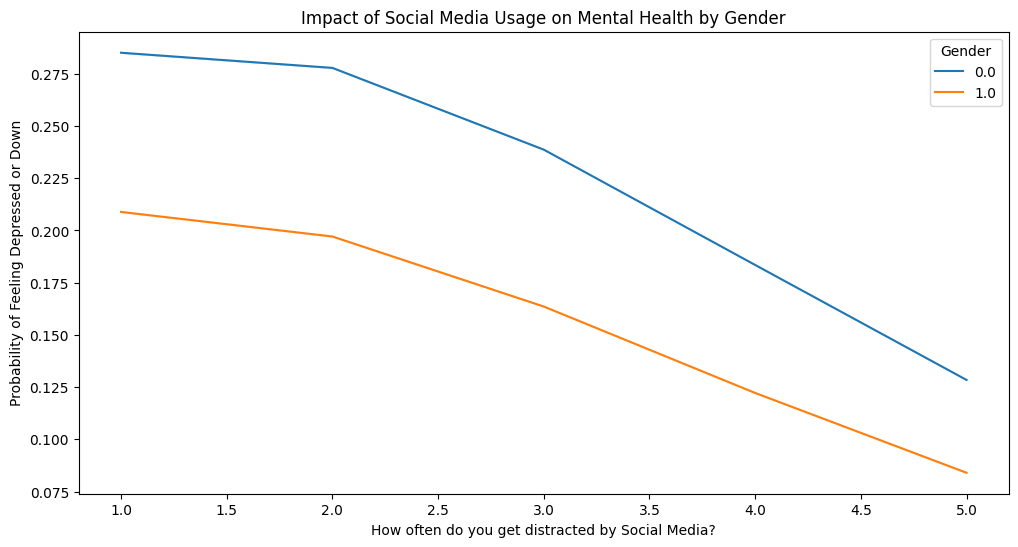

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = pd.read_csv('MYDATASET.csv')


columns_of_interest = [
    '2. Gender',
    '10. How often do you get distracted by Social media when you are busy doing something?',
    '18. How often do you feel depressed or down?',
]

filtered_data = data[columns_of_interest]

filtered_data = filtered_data.rename(columns={
    '2. Gender': 'Gender',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'Distracted by Social Media',
    '18. How often do you feel depressed or down?': 'Feel Depressed or Down',
})

gender_mapping = {
    'Male': 0,
    'Female': 1,
}
filtered_data['Gender'] = filtered_data['Gender'].map(gender_mapping)

# Drop rows with missing values
filtered_data = filtered_data.dropna()

# Split the data into features and target
X = filtered_data[['Distracted by Social Media', 'Gender']]
y = filtered_data['Feel Depressed or Down']

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the features
X = imputer.fit_transform(X)

# Fit a logistic regression model on the full dataset
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities for the full dataset
probs = model.predict_proba(X)[:, 1]

# Add the predicted probabilities to the dataset
filtered_data['Probability'] = probs

# Create line plots for each gender
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Distracted by Social Media', y='Probability', hue='Gender')
plt.xlabel('How often do you get distracted by Social Media?')
plt.ylabel('Probability of Feeling Depressed or Down')
plt.title('Impact of Social Media Usage on Mental Health by Gender')
plt.legend(title='Gender')
plt.show()

In [2]:
# Add the predicted probabilities to the dataset
filtered_data['Probability'] = probs

# Print the first few rows of the dataset
print(filtered_data.head())


   Gender  Distracted by Social Media  Feel Depressed or Down  Probability
0     0.0                           3                       5     0.238695
1     1.0                           3                       5     0.163599
2     1.0                           2                       4     0.197120
3     1.0                           2                       4     0.197120
4     1.0                           5                       4     0.084034


In [3]:

from scipy.stats import pearsonr

social_media_usage_column = '10. How often do you get distracted by Social media when you are busy doing something?'
mental_health_column = '18. How often do you feel depressed or down?'

# Convert the columns to numeric (if not already)
data[social_media_usage_column] = pd.to_numeric(data[social_media_usage_column], errors='coerce')
data[mental_health_column] = pd.to_numeric(data[mental_health_column], errors='coerce')

# Drop rows with missing values
data = data.dropna(subset=[social_media_usage_column, mental_health_column])

# Calculate the correlation between social media usage and mental health outcomes
correlation, p_value = pearsonr(data[social_media_usage_column], data[mental_health_column])

# Determine the type of correlation
if correlation > 0:
    correlation_type = "Positive Correlation"
elif correlation < 0:
    correlation_type = "Negative Correlation"
else:
    correlation_type = "No Correlation"

# Print the correlation coefficient, p-value, and correlation type
print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Correlation Type: {correlation_type}")


Correlation coefficient: 0.38
P-value: 0.0000
Correlation Type: Positive Correlation


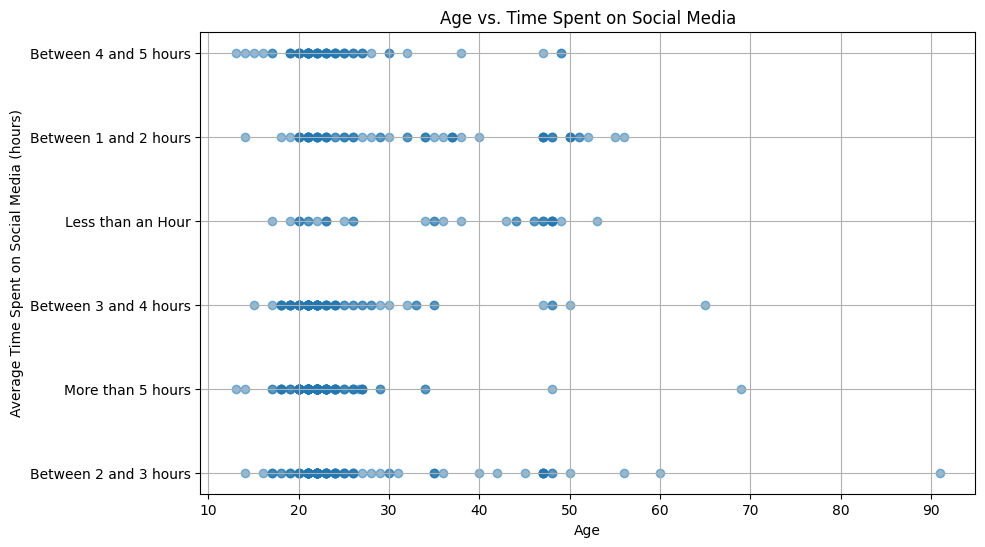

In [4]:
age_column = '1. What is your age?'
time_spent_column = '8. What is the average time you spend on social media every day?'

# Filter out rows with missing values in these columns
filtered_data = data.dropna(subset=[age_column, time_spent_column])

# Extract the age and time spent on social media as arrays
ages = filtered_data[age_column]
time_spent = filtered_data[time_spent_column]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ages, time_spent, alpha=0.5)  # Use alpha to control point transparency
plt.xlabel('Age')
plt.ylabel('Average Time Spent on Social Media (hours)')
plt.title('Age vs. Time Spent on Social Media')
plt.grid(True)  # Add gridlines to the plot

# Show the plot
plt.show()

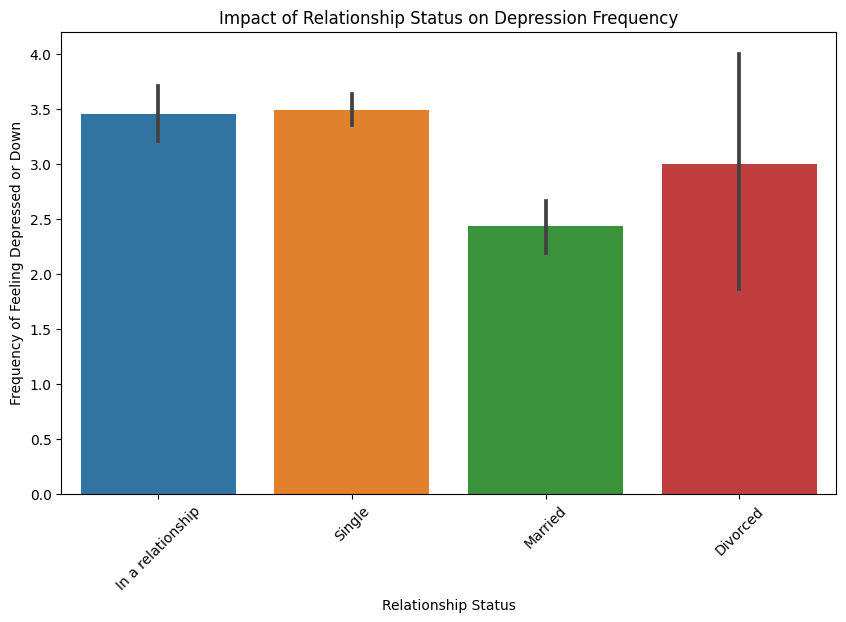

In [5]:
# Define the relevant columns for the analysis
columns_of_interest = [
    '3. Relationship Status',
    '18. How often do you feel depressed or down?',
]

# Filter the dataset to include only the selected columns
filtered_data = data[columns_of_interest]

# Rename columns for clarity
filtered_data = filtered_data.rename(columns={
    '3. Relationship Status': 'Relationship Status',
    '18. How often do you feel depressed or down?': 'Depression Frequency',
})

# Analyze the impact of 'Relationship Status' on 'Depression Frequency'
plt.figure(figsize=(10, 6))
sns.barplot(x='Relationship Status', y='Depression Frequency', data=filtered_data)
plt.xlabel('Relationship Status')
plt.ylabel('Frequency of Feeling Depressed or Down')
plt.title('Impact of Relationship Status on Depression Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


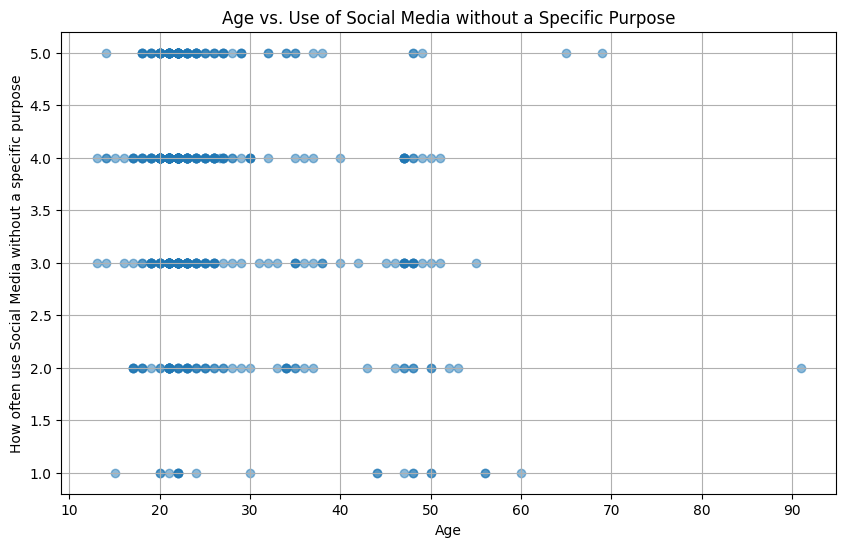

In [6]:
age_column = '1. What is your age?'
specific_purpose_column = '9. How often do you find yourself using Social media without a specific purpose?'

# Filter out rows with missing values in these columns
filtered_data = data.dropna(subset=[age_column, specific_purpose_column])

# Extract the age and specific purpose data as arrays
ages = filtered_data[age_column]
specific_purpose = filtered_data[specific_purpose_column]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ages, specific_purpose, alpha=0.5)  # Use alpha to control point transparency
plt.xlabel('Age')
plt.ylabel('How often use Social Media without a specific purpose')
plt.title('Age vs. Use of Social Media without a Specific Purpose')
plt.grid(True)  # Add gridlines to the plot

# Show the plot
plt.show()

In [7]:
time_spent_column = '8. What is the average time you spend on social media every day?'
depression_column = '18. How often do you feel depressed or down?'

# Calculate the covariance
time_mapping = {
    'Less than 1 hour': 0,
    'More than 1 hour but less than 2 hours': 1,
    'More than 2 hours but less than 3 hours': 2,
    'More than 3 hours but less than 4 hours': 3,
    'More than 4 hours but less than 5 hours': 4,
    'More than 5 hours': 5
}

data[time_spent_column] = data[time_spent_column].map(time_mapping)

depressed_column = '18. How often do you feel depressed or down?'

# Calculate the standard deviation
std_depressed = data[depressed_column].std()


print(f"Standard Deviation for Feeling Depressed or Down: {std_depressed:.2f}")

Standard Deviation for Feeling Depressed or Down: 1.31


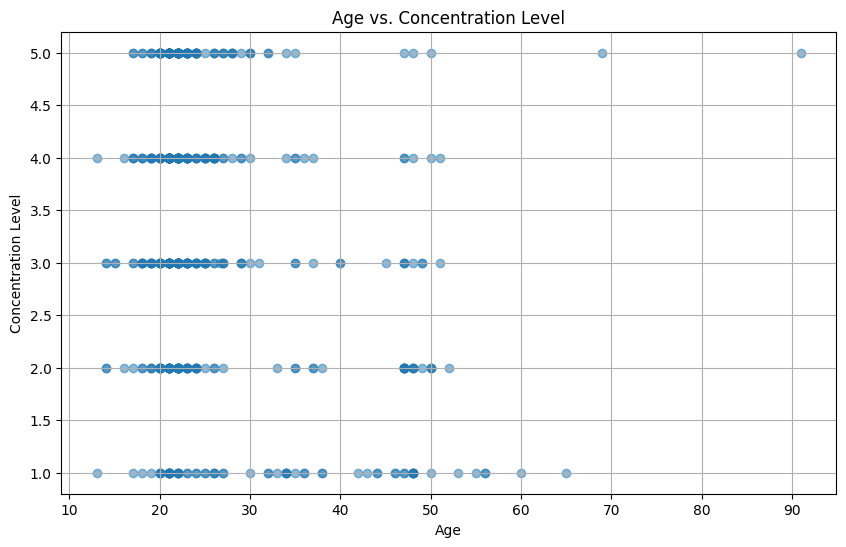

In [8]:
age_column = '1. What is your age?'
concentration_column = '14. Do you find it difficult to concentrate on things?'

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data[age_column], data[concentration_column], alpha=0.5)
plt.title('Age vs. Concentration Level')
plt.xlabel('Age')
plt.ylabel('Concentration Level')
plt.grid(True)
plt.show()

In [9]:
time_mapping = {
    'Less than 1 hour': 0,
    'More than 1 hour but less than 2 hours': 1,
    'More than 2 hours but less than 3 hours': 2,
    'More than 3 hours but less than 4 hours': 3,
    'More than 4 hours but less than 5 hours': 4,
    'More than 5 hours': 5
}

data[time_spent_column] = data[time_spent_column].map(time_mapping)

column2 = '10. How often do you get distracted by Social media when you are busy doing something?'

variance2 = data[column2].var()


std_deviation2 = data[column2].std()

print(f"Variance for {column2}: {variance2:.2f}")
print(f"Standard Deviation for {column2}: {std_deviation2:.2f}")

Variance for 10. How often do you get distracted by Social media when you are busy doing something?: 1.76
Standard Deviation for 10. How often do you get distracted by Social media when you are busy doing something?: 1.33


<ipython-input-10-6ea41db8eef0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[time_spent_column] = pd.to_numeric(filtered_data[time_spent_column])
<ipython-input-10-6ea41db8eef0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=[org_affiliation_column, time_spent_column], inplace=True)


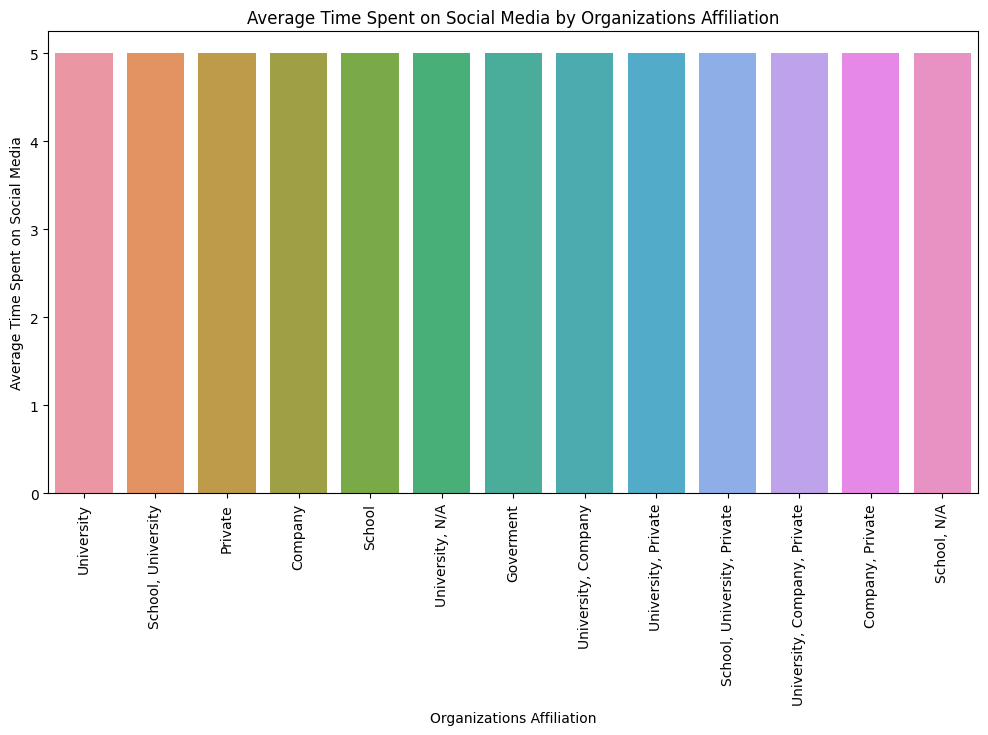

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MYDATASET.csv')
time_mapping = {
    'Less than 1 hour': 0,
    'More than 1 hour but less than 2 hours': 1,
    'More than 2 hours but less than 3 hours': 2,
    'More than 3 hours but less than 4 hours': 3,
    'More than 4 hours but less than 5 hours': 4,
    'More than 5 hours': 5
}

data[time_spent_column] = data[time_spent_column].map(time_mapping)

# Define the actual column names from your dataset
org_affiliation_column ='5. What type of organizations are you affiliated with?'
time_spent_column ='8. What is the average time you spend on social media every day?'

# Check if the column names are in your dataset
if org_affiliation_column in data.columns and time_spent_column in data.columns:
    # Filter the dataset to include only the selected columns
    filtered_data = data[[org_affiliation_column, time_spent_column]]

    # Convert time_spent_column to numeric and handle errors
    try:
        filtered_data[time_spent_column] = pd.to_numeric(filtered_data[time_spent_column])
    except pd.errors.OutOfBoundsDatetime:
        print("Error converting the 'time_spent_column' to numeric. Please check the data in this column.")

    # Remove rows with missing or invalid values
    filtered_data.dropna(subset=[org_affiliation_column, time_spent_column], inplace=True)

    if not filtered_data.empty:
        # Create a bar plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=org_affiliation_column, y=time_spent_column, data=filtered_data)
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.xlabel('Organizations Affiliation')
        plt.ylabel('Average Time Spent on Social Media')
        plt.title('Average Time Spent on Social Media by Organizations Affiliation')
        plt.show()
    else:
        print("The selected columns contain no valid data for plotting.")
else:
    print("One or both of the specified column names do not exist in the dataset.")

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('MYDATASET.csv')

# List all column names in the dataset
print(data.columns)


Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

CORRELATION ANALYSIS


In [12]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('MYDATASET.csv')

# Define the column names
social_media_column = '6. Do you use social media?'
mental_health_column = '18. How often do you feel depressed or down?'

# Filter the dataset to include only the selected columns and remove rows with missing values
filtered_data = data[[social_media_column, mental_health_column]].dropna()

# Convert the '6. Do you use social media?' column to numeric (assuming 'Yes' -> 1, 'No' -> 0)
filtered_data[social_media_column] = filtered_data[social_media_column].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(filtered_data[social_media_column], filtered_data[mental_health_column])

# Output the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation Coefficient: 0.12
P-value: 0.0108


VISUALIZATION


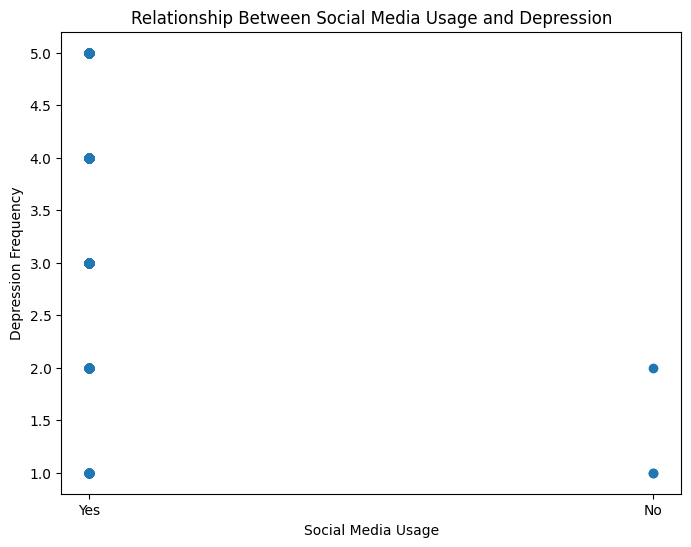

In [13]:
# Define the column names
social_media_column = '6. Do you use social media?'
mental_health_column = '18. How often do you feel depressed or down?'

# Filter the dataset to include only the selected columns and remove rows with missing values
filtered_data = data[[social_media_column, mental_health_column]].dropna()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data[social_media_column], filtered_data[mental_health_column])
plt.xlabel('Social Media Usage')
plt.ylabel('Depression Frequency')
plt.title('Relationship Between Social Media Usage and Depression')
plt.show()


HYPOTHESIS TESTING

In [14]:
# Define the column names
social_media_column = '6. Do you use social media?'
mental_health_column = '18. How often do you feel depressed or down?'

# Split the data into two groups: social media users and non-users
social_media_users = data[data[social_media_column] == 'Yes'][mental_health_column]
non_social_media_users = data[data[social_media_column] == 'No'][mental_health_column]

# Perform a t-test to compare means
t_stat, p_value = stats.ttest_ind(social_media_users, non_social_media_users, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in depression between social media users and non-users.")
else:
    print("There is no significant difference in depression between social media users and non-users.")


T-statistic: 5.71
P-value: 0.0253
There is a significant difference in depression between social media users and non-users.


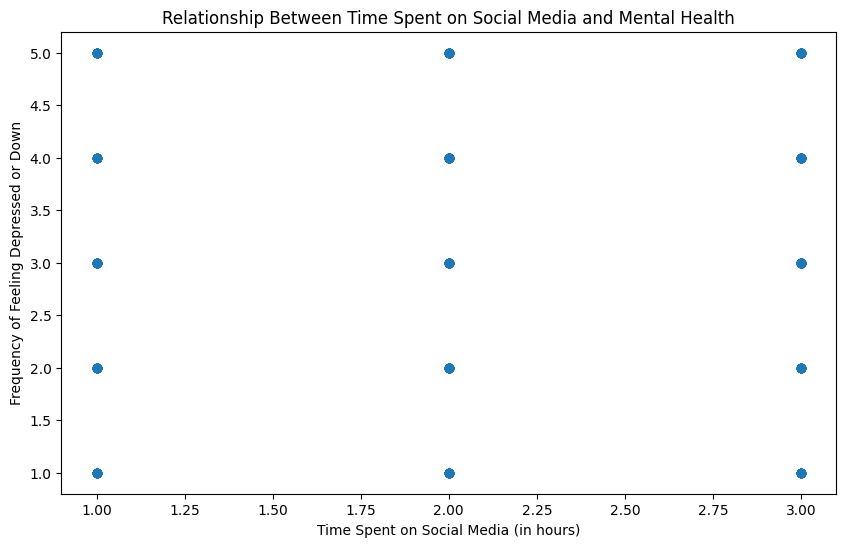

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MYDATASET.csv')

# Map non-numeric values to numeric values for time spent on social media
time_spent_mapping = {
    'Less than 1 hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'More than 4 hours': 4
}

data['8. What is the average time you spend on social media every day?'] = data['8. What is the average time you spend on social media every day?'].map(time_spent_mapping)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['8. What is the average time you spend on social media every day?'], data['18. How often do you feel depressed or down?'])
plt.xlabel('Time Spent on Social Media (in hours)')
plt.ylabel('Frequency of Feeling Depressed or Down')
plt.title('Relationship Between Time Spent on Social Media and Mental Health')
plt.show()
